In [2]:
import os
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
from scipy.stats import sem
import matplotlib.pyplot as plt
import seaborn as sns
from statannotations.Annotator import Annotator

sns.set(color_codes=True, style="white")
pd.options.mode.chained_assignment = None  # default='warn'

In [30]:
folder = "/Volumes/guttman/Guoming_Gao-Resnick/qPCR/20250313"
fname = "20250313-formatted-dCp-calculated.csv"
os.chdir(folder)
data = pd.read_csv(fname)
data['Mol'] = 2**data['dCp_value']
control_mean = data[data['Condition'] == 'DMSO']['Mol'].mean()
data['relative_Mol'] = data['Mol'] / control_mean

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

DMSO vs. Carfilzomib: t-test independent samples, P_val:4.404e-01 t=7.912e-01
DMSO vs. MG132: t-test independent samples, P_val:2.879e-09 t=1.172e+01
DMSO vs. Bortezomib: t-test independent samples, P_val:1.386e-08 t=1.050e+01


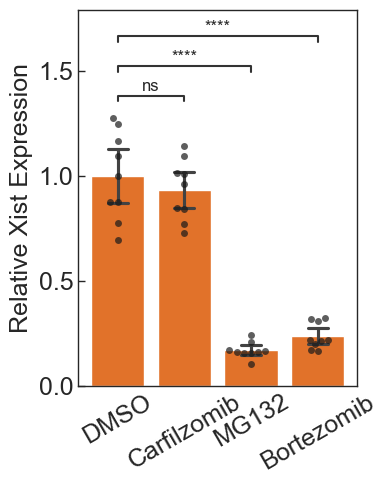

In [32]:
# Create the violin plot overlayed with a swarm plot
plt.figure(figsize=(4, 5))
ax = sns.barplot(
    data=data,
    x="Condition",
    y="relative_Mol",
    order=["DMSO", "Carfilzomib", "MG132", "Bortezomib"],
    errorbar=("ci", 95),
    capsize=0.3,
    color="#FF6C0C",
)
sns.swarmplot(
    x="Condition",
    y="relative_Mol",
    data=data,
    color="k",
    alpha=0.7,
)

# Define group pairs for comparison
pairs = [
    ("DMSO", "Carfilzomib"),
    ("DMSO", "MG132"),
    ("DMSO", "Bortezomib"),
]

# Add statistical annotations
annotator = Annotator(
    ax,
    pairs,
    data=data,
    x="Condition",
    y="relative_Mol",
    order=["DMSO", "Carfilzomib", "MG132", "Bortezomib"],
)
annotator.configure(test="t-test_ind", text_format="star", loc="inside")
annotator.apply_and_annotate()

# adjust
plt.xlabel("")
# plt.ylabel(r"Fold Change$_{(Xist,Pol2a)}$", fontsize=18)
plt.ylabel(r"Relative Xist Expression", fontsize=18)
plt.xticks(rotation=30)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)

plt.tight_layout()
plt.savefig("qPCR_results-pleaserename.png", format="png", dpi=300)